# Heavy Traffic Indicators

For this project, I will analyze the dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94) roughly midway between Minneapolis and St Paul, MN

The goal is to determine indicators of heavy traffic. These indicators can be based on the weather type, time of the day, time of the week etc

The dataset was made available by John Hogue and can be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
traffic.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918

In [4]:
traffic.tail()

holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954

In [5]:
traffic.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

### Column Descriptions

holiday -Categorical US National holidays plus regional holiday, Minnesota State Fair

temp - Numeric Average temp in kelvin

rain_1h - Numeric Amount in mm of rain that occurred in the hour

snow_1h - Numeric Amount in mm of snow that occurred in the hour

clouds_all - Numeric Percentage of cloud cover

weather_main - Categorical Short textual description of the current weather

weather_description - Categorical Longer textual description of the current weather

date_time - DateTime Hour of the data collected in local CST time

traffic_volume - Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [6]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48204 rows with no null values. The data range for this data is from 2012-10-02 09:00:00 to 2018-09-30 23:00:00

## Analyzing Traffic Volumes

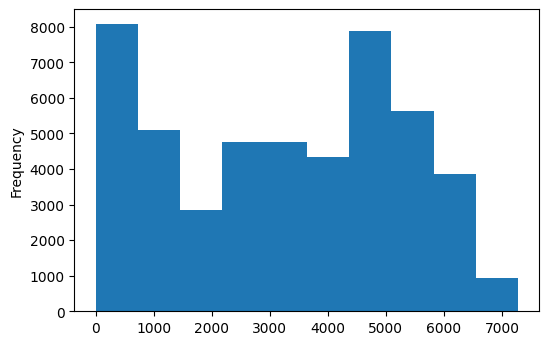

In [7]:
traffic['traffic_volume'].plot.hist()
plt.show()

In [8]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between the give datatime range, the number of cars in traffic varied from 0 to 7280 with an average of 3260 cars per day

25% of the time, there were 1193 cars going westbound from the station each hour which is most likely during nighttime. However, 75% of the time there about 4933 car going westbound and is most likely during day time.

## Influence of Day and Night on Traffic Volume

We'll start by dividing the dataset into two parts:

1. Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
2. Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [9]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [10]:
traffic_dt = traffic['date_time']

In [11]:
day = traffic.copy()[(traffic_dt.dt.hour >= 7) & (traffic_dt.dt.hour < 19)]
day.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description           date_time  traffic_volume  
0    scattered clouds 2012-10-02 09:00:00            5545  
1       broken clouds 2012-10-02 10:00:00            4516  
2     overcast clouds 2012-10-02 11:00:00            4767  
3     overcast clouds 2012-10-02 12:00:00            5026  
4       broken clouds 2012-10-02 13:00:00            4918

In [12]:
night = traffic.copy()[(traffic_dt.dt.hour >= 19) | (traffic_dt.dt.hour < 7)]
night.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
10    None  290.97      0.0      0.0          20       Clouds   
11    None  289.38      0.0      0.0           1        Clear   
12    None  288.61      0.0      0.0           1        Clear   
13    None  287.16      0.0      0.0           1        Clear   
14    None  285.45      0.0      0.0           1        Clear   

   weather_description           date_time  traffic_volume  
10          few clouds 2012-10-02 19:00:00            3539  
11        sky is clear 2012-10-02 20:00:00            2784  
12        sky is clear 2012-10-02 21:00:00            2361  
13        sky is clear 2012-10-02 22:00:00            1529  
14        sky is clear 2012-10-02 23:00:00             963

In [13]:
print(day.shape)
print(night.shape)
print(day['traffic_volume'].max())
print(night['traffic_volume'].max())

(23877, 9)
(24327, 9)
7280
6386


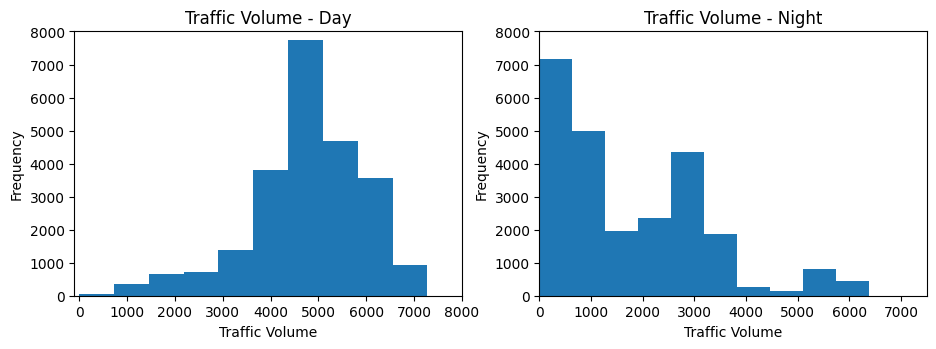

In [14]:
plt.figure(figsize=[11,3.5])

plt.subplot(1, 2, 1)
day['traffic_volume'].plot.hist()
plt.xlim(-100,8000)
plt.ylim(0,8000)
plt.title('Traffic Volume - Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
night['traffic_volume'].plot.hist()
plt.xlim(0,7500)
plt.ylim(0,8000)
plt.title('Traffic Volume - Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.show()

In [15]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

In [16]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

## Analysis
The histogram that shows the distribution of traffic during the day is left skewed. This indicates that traffic is usually high or heavy during the day. In the description of this dataset, traffic volume is usually around 4252 25% of the time and 5559 75% of the time with an average traffic volume of 4762 cars during day time.

This is however not the case for the histogram that shows the distribution of traffic at night time which is right skewed. The average traffic volume at night is 1785 cars which is at least 2 times the average volume during the day.

Our goal is to find indicators of heavy traffic. Therefore we will not be using the nighttime dataset moving forward.

## Time Indicators

We will use line plots to show how the mean traffic volumne changes according to the following parameters:
1. Month
2. Day of the week
3. Time of the day

In [17]:
day.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description           date_time  traffic_volume  
0    scattered clouds 2012-10-02 09:00:00            5545  
1       broken clouds 2012-10-02 10:00:00            4516  
2     overcast clouds 2012-10-02 11:00:00            4767  
3     overcast clouds 2012-10-02 12:00:00            5026  
4       broken clouds 2012-10-02 13:00:00            4918

## Month

In [18]:
day['month'] = day['date_time'].dt.month

In [19]:
day.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description           date_time  traffic_volume  month  
0    scattered clouds 2012-10-02 09:00:00            5545     10  
1       broken clouds 2012-10-02 10:00:00            4516     10  
2     overcast clouds 2012-10-02 11:00:00            4767     10  
3     overcast clouds 2012-10-02 12:00:00            5026     10  
4       broken clouds 2012-10-02 13:00:00            4918     10

In [20]:
by_month = day.groupby('month').mean()

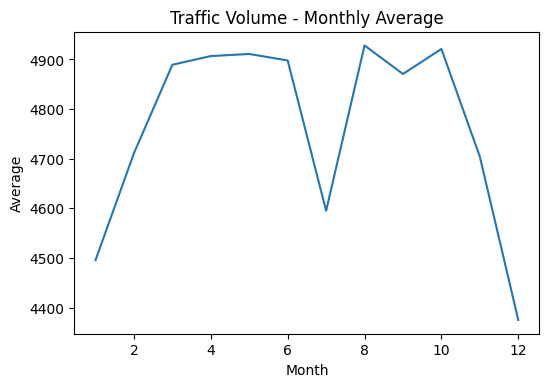

In [21]:
by_month['traffic_volume'].plot.line()
plt.xlabel('Month')
plt.ylabel('Average')
plt.title('Traffic Volume - Monthly Average')
plt.show()

## Observations
Traffic volume is usually low during cold months and very intense during warm months except for July

## Day of Week

In [22]:
day['day_of_week'] = day['date_time'].dt.dayofweek

In [23]:
day.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description           date_time  traffic_volume  month  day_of_week  
0    scattered clouds 2012-10-02 09:00:00            5545     10            1  
1       broken clouds 2012-10-02 10:00:00            4516     10            1  
2     overcast clouds 2012-10-02 11:00:00            4767     10            1  
3     overcast clouds 2012-10-02 12:00:00            5026     10            1  
4       broken clouds 2012-10-02 13:00:00            4918     10            1

In [24]:
by_dayofweek = day.groupby('day_of_week').mean()
by_dayofweek['traffic_volume']

day_of_week
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

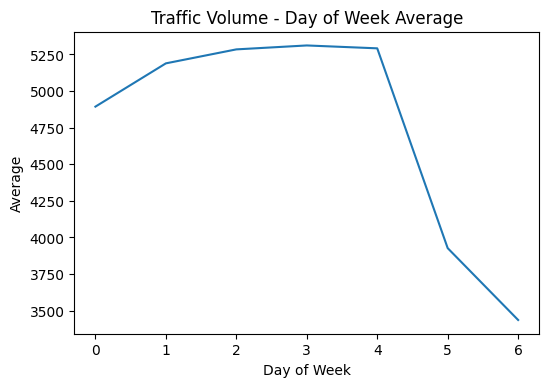

In [25]:
by_dayofweek['traffic_volume'].plot.line()
plt.xlabel('Day of Week')
plt.ylabel('Average')
plt.title('Traffic Volume - Day of Week Average')
plt.show()

## Time of Day

Since traffic volume is mostly high during business days, we will analyze traffic volume by time of day of business days only

In [26]:
day.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description           date_time  traffic_volume  month  day_of_week  
0    scattered clouds 2012-10-02 09:00:00            5545     10            1  
1       broken clouds 2012-10-02 10:00:00            4516     10            1  
2     overcast clouds 2012-10-02 11:00:00            4767     10            1  
3     overcast clouds 2012-10-02 12:00:00            5026     10            1  
4       broken clouds 2012-10-02 13:00:00            4918     10            1

In [27]:
day['hour'] = day['date_time'].dt.hour

In [28]:
day.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description           date_time  traffic_volume  month  day_of_week  \
0    scattered clouds 2012-10-02 09:00:00            5545     10            1   
1       broken clouds 2012-10-02 10:00:00            4516     10            1   
2     overcast clouds 2012-10-02 11:00:00            4767     10            1   
3     overcast clouds 2012-10-02 12:00:00            5026     10            1   
4       broken clouds 2012-10-02 13:00:00            4918     10            1   

   hour  
0     9  
1    10  
2    11  
3    12  
4    13

In [29]:
weekdays = day.copy()[day['day_of_week'] <=4]
weekends = day.copy()[day['day_of_week'] >= 5]

In [30]:
hour_weekdays = weekdays.groupby('hour').mean()
hour_weekends = weekends.groupby('hour').mean()

In [31]:
print(hour_weekdays['traffic_volume'])
print(hour_weekends['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


In [32]:
print(hour_weekdays['traffic_volume'].describe())
print(hour_weekends['traffic_volume'].describe())

count      12.000000
mean     5192.498812
std       615.622781
min      4378.419118
25%      4799.891475
50%      5024.132518
75%      5640.880110
max      6189.473647
Name: traffic_volume, dtype: float64
count      12.000000
mean     3709.128440
std       911.307344
min      1589.365894
25%      3542.880206
50%      4098.037442
75%      4346.478609
max      4372.482883
Name: traffic_volume, dtype: float64


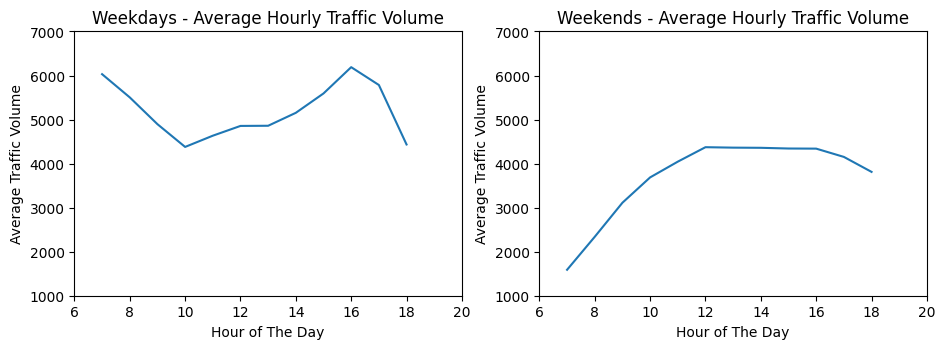

In [33]:
plt.figure(figsize=[11, 3.5])

plt.subplot(1,2,1)
hour_weekdays['traffic_volume'].plot.line()
plt.xlabel('Hour of The Day')
plt.ylabel('Average Traffic Volume')
plt.xlim(6,20)
plt.ylim(1000, 7000)
plt.title('Weekdays - Average Hourly Traffic Volume')

plt.subplot(1,2,2)
hour_weekends['traffic_volume'].plot.line()
plt.xlabel('Hour of The Day')
plt.ylabel('Average Traffic Volume')
plt.xlim(6,20)
plt.ylim(1000, 7000)
plt.title('Weekends - Average Hourly Traffic Volume')

plt.show()

## Observation

On weekdays, traffic volume is usually high in the early hours of the day. That is, 7am - 8am. We then see a sharp decline in traffic volume from 8am to 10am. This is because working hours for most peopl starts around that time range. We then see a steady increase in traffic volume from 10am to 5pm where traffic volume peaks again due to people leaving work places to home.

The weekend chart is quite different though. There is a steady increase in traffic volume from 7am to 12am. We can conclude that within this timeframe, most people are not in a rush to get to their destinations as it is the weekend. The traffic volume remains relatively steady from 12pm to 6pm from which it starts dropping at a steady rate too.

We can make these observations for the nighttime dataset too

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.



In [34]:
day.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description           date_time  traffic_volume  month  day_of_week  \
0    scattered clouds 2012-10-02 09:00:00            5545     10            1   
1       broken clouds 2012-10-02 10:00:00            4516     10            1   
2     overcast clouds 2012-10-02 11:00:00            4767     10            1   
3     overcast clouds 2012-10-02 12:00:00            5026     10            1   
4       broken clouds 2012-10-02 13:00:00            4918     10            1   

   hour  
0     9  
1    10  
2    11  
3    12  
4    13

In [36]:
# Correlation values between traffic_volume and numerical weather columns
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
day_of_week      -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The temp column has the strongest correlation with traffic volume. We will show this on a scatter plot.

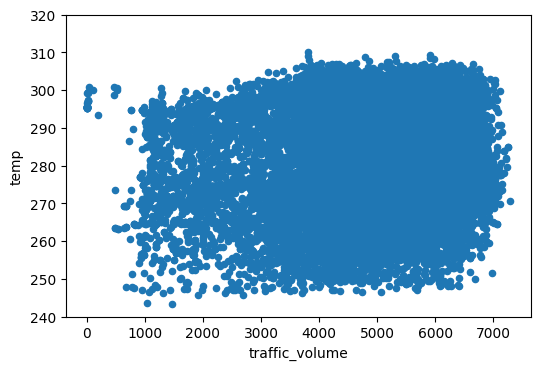

In [39]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(240,320 )
plt.show()

There is no clear indication that the weather has any effect on traffic volume

To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description.

We're going to calculate the average traffic volume associated with each unique value in these two columns.


In [41]:
weather_main = day.groupby('weather_main').mean()
weather_desc = day.groupby('weather_description').mean()

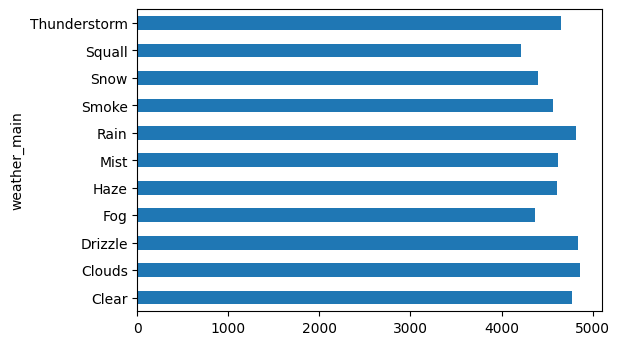

In [58]:
weather_main['traffic_volume'].plot.barh()
plt.show()

There is no clear indication that the weather type has an effect on traffic volume as the value of each weather type is around the daytime mean of 4,762 and does not exceed 5000.

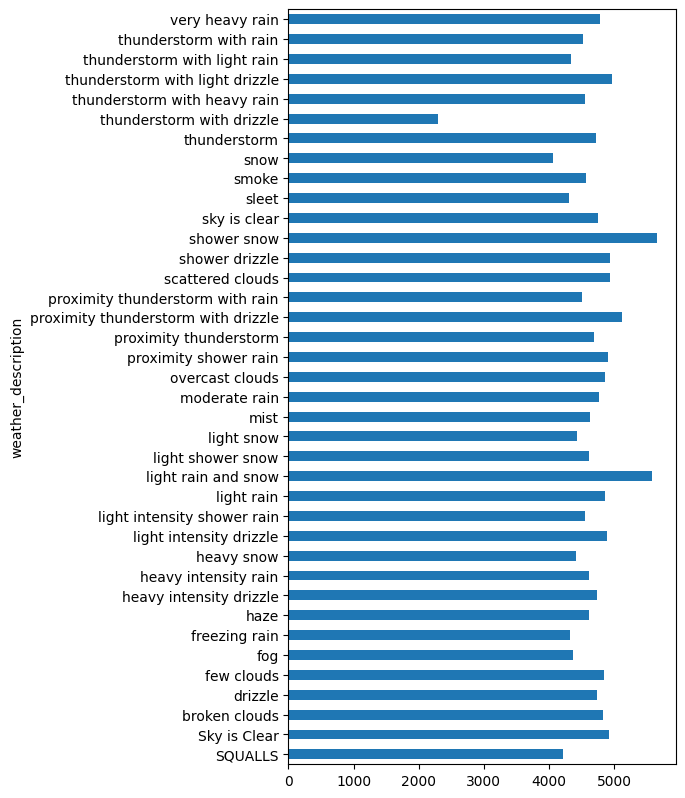

In [60]:
weather_desc['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

There are 3 weather types with traffic volume values that exceed 5000. They are:

1. Shower snow
2. Light rain and snow
3. Proximity thunderstorm with drizzle

However, these are not extreme conditions and as such they still do not give a clear indication as to how the weather affects traffic volume

# Conclusions

Our goal was to determine indicators of heavy traffic. Per our analysis, we can conclude that:

1. The time of day has a significant influence on traffic volume. This could be seen from the huge difference in traffic volume during the day and during the night.

2. Our monthly analysis also showed us how traffic volume reacts during different seasons within a year.

3. Our weather analysis did not provide us with strong indication of the weather type influence of traffic. However, we saw the traffic volume is usually high when there is shower snow, light rain/snow and thunderstorms with drizzle